# Liu Xingyu - DAV 6150 - Assignment 13

## Introduction

In this report, I will analyze on a data set consisting of physical characteristics and price of diamonds to compare the performance of Neural networks based on different hyperparameters and activation functions. I will construct three Neural networks using same explanatory variables but different hyperparameters and activation functions, and compare their performance using accuracy. This information could be used to learn how well could hyperparameters and activation functions could influnce the accuracy of the Neural Network model.

To accomplish this, I will first perform an exploratory data analysis on each of the variables in an effort to discover any data integrity issues, uncover outliers, and see the distribution of the data. 

Then, based on the results of my EDA, I will perform the necessary data preparation and cleaning in order to prepare the data for use. This work will be guided by my domain knowledge and EDA, I will again perform an EDA on my transformed data, in order to see the effects of my transformations on the data. 

After the data preparation I will perform feature selection by calculating entropy and information gain.

Then I will split the data into training and testing subsets, use the training subset to construct three Neural Networks using same combinations of four explanatory variables, fit models with the testing data to see how my model performs. 

Lastly, I will choose the best model from those I constructed based on accuracy and loss.

## Data Profiling & Domain Knowledge Development

**price** - price in US dollars (326 dollars -- 18,823 dollars)

**carat** - Carat is a unit of mass equal to 200 mg and is used for measuring gemstones and pearls, weight of the diamond (0.2--5.01)

**cut** - Cut grade is is an objective measure of a diamond’s light performance, or, what we generally think of as sparkle, quality of the cut (Fair, Good, Very Good, Premium, Ideal)

**color** - diamond colour, from D (best) to J (worst), 'D,E,F' are colorless, 'G,H,I,J' are near colorless.

**clarity** - a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

**x** - length in mm (0--10.74)

**y** - width in mm (0--58.9)

**z** - depth in mm (0--31.8)

**depth** - total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

**table** - width of top of diamond relative to widest point (43--95)

## Exploratory Data Analysis

First I will read the data from github repository into python using pandas read csv function. Then I will look for missing and/or invalid data values and perform an exploratory data analysis on my dataset to determine what data need to be prepared for a future machine learning model. 

In [2]:
#first import the necessary libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#next read in the file
filename = 'https://raw.githubusercontent.com/Bella1025/DAV6150./master/Project3_Data%20(1).csv'
diamond = pd.read_csv(filename)

#check results
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
# check the dataset for null values
diamond.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

I could see that there is no missing values in the diamond data set.

In [4]:
## Check the types of the data
diamond.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

From above, I see that variables carat, depth, table, price, x, y and z are numeric variables, while cut, color and clarity are categorical variables.

In [5]:
#get summary statistics for each variable, including mean, standard deviation, median, quartiles, and range
diamond.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


I see from above that the range of data set do not contain negative values. From my domain knowledge and research, there should not be negative values for these attributes. So there is no need to deal with negative values.

However, the minimum value of x, y and z is 0, in reality, the length, width and depth could not be 0, so these are invalid values which need to be dealt in the following section.

The mean value of carat is 0.797940, the mean value of depth is 61.749405, the mean value of table is 57.457184, the mean value of price is 3932.788722, the mean value of x is 5.731157, the mean value of y is 5.734526, the mean value of z is 3.538734. The mean value of price is much bigger than other variables, the mean value of carat is much lower than other variables. Also, the std of price is much higher than other variables'std, the std of carat is much lower than other variables'std, So the data need to be normalized or standarized, I will demonstrate further to show how will I deal with this.

Next I will look at the distributions of my data to identify the shape of the distribution as well as identify any potential outliers.

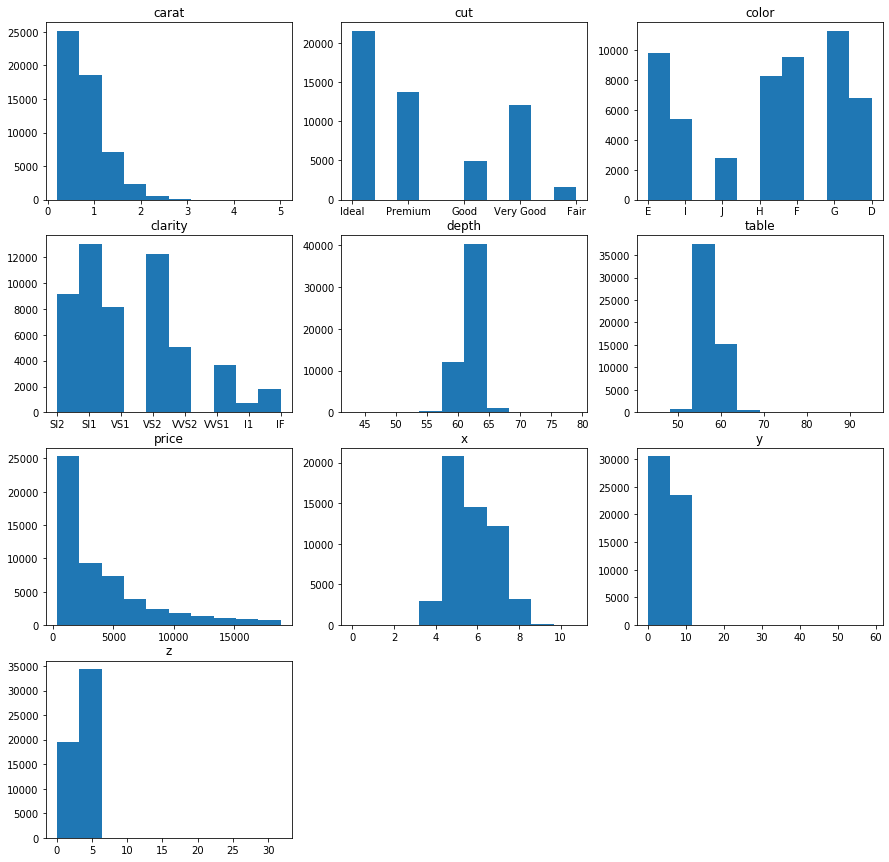

In [6]:
#define a figure to which we will add a histogram for each of our attributes
plt.figure(figsize=(15,15))

i=1
columns=diamond.columns.tolist()
for k in columns[0:] :  
    plt.subplot(4,3,i) 
    plt.hist(diamond[k])
    plt.title('%s' %k)
    i=i+1

#show results    
plt.show()

From the above histograms, I see that the majority of my attributes are of no pattern. The variables carat, price and y are approximately skewed distributions, the variables x is approximately normal distributed.

Next I will look at boxplots of the numeric data to see if there are any outliers.

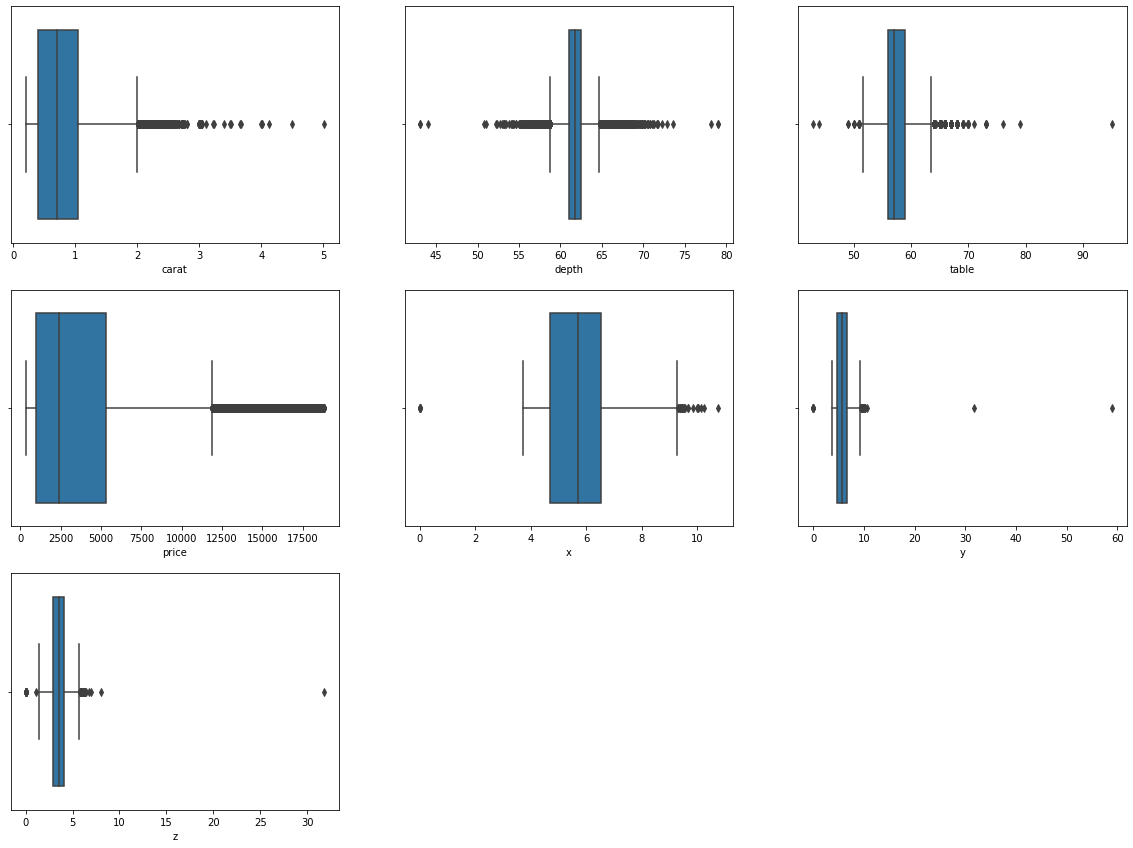

In [7]:
#define a figure to which we will add boxplots of each attribute.
plt.figure(figsize=(20,20))

diamondn = diamond[['carat','depth','table','price','x','y','z']]

i=1
columns=diamondn.columns.tolist()
for k in columns[0:] :   
    plt.subplot(4,3,i) 
    sns.boxplot(x=k,data=diamondn)
    i=i+1 

#show results
plt.show()

From the above boxplots I see that most of attributes have numerous outliers. I will discuss further below how I will deal with these outliers.

I will also check a correlation matrix between the numeric variables before any transformation to see if my transformations have any effect on the correlation.

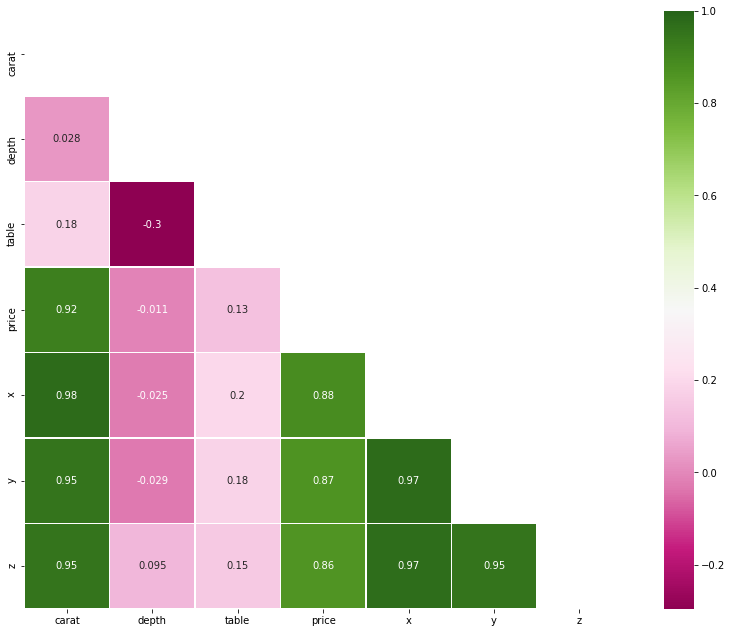

In [8]:
cor_matrix = diamondn.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(cor_matrix, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (15, 11))
sns.heatmap(cor_matrix, mask=mask, 
            square = True, linewidths = 0.5, ax = ax, cmap = "PiYG",annot=True)

I see from correlation matrix that lots of attributes have a particularly strong correlation. 

- x and carat have correlation of 0.98
- x and z have correlation of 0.97
- x and y have correlation of 0.97
- y and z have correlation of 0.95
- y and carat have correlation of 0.95
- z and carat have correlation of 0.95
- price and carat have correlation of 0.92
- price and x have correlation of 0.88
- price and y have correlation od 0.87
- price and z have correlation of 0.86. 

From my domain knowledge, sice z is calculated from x and y, so the correlations among x, y and z are reasonable.

In [9]:
#Check whether there are mistakes and omissions on categorical variables.
diamondc = ['cut', 'color','clarity']

for each in diamondc:
    print(each + ':\n')
    print(list(diamond[each].drop_duplicates()))
    print('\n')

cut:

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']


color:

['E', 'I', 'J', 'H', 'F', 'G', 'D']


clarity:

['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']




From above I see that, variable cut has five labels, color has seven labels, clarity has eight labels. 

Those are the same with the domain knowledge given.

In [10]:
## Summarize the categorical data by using the function value_counts().
diamond['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [11]:
## Summarize the categorical data by using the function value_counts().
diamond['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [12]:
## Summarize the categorical data by using the function value_counts().
diamond['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

I could see from above that the Ideal cut occupied large proportion of 'cut', while the Fair cut occupies the least proportion of 'cut', the colorless diamond occupies large proportion of 'color', the near colorless diamond occupies not that much proportion of 'color', SI2 occupies the largest proportion of 'clarity', while I1 occupies the least proportion of 'Clarity'.

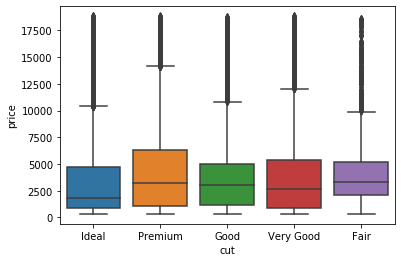

In [13]:
## plot boxplots with categorical variable cut
sns.boxplot(x='cut',y='price',data = diamond)

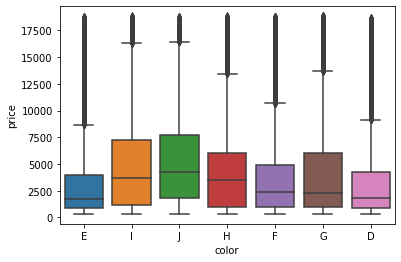

In [14]:
## plot boxplots with categorical variable color
sns.boxplot(x='color',y='price',data = diamond)

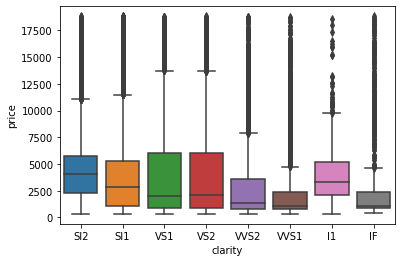

In [15]:
## plot boxplots with categorical variable cut
sns.boxplot(x='clarity',y='price',data = diamond)

From above I could see that the price of diamond with Fair cut has most outliers, the price of diamond with color E has most outliers, the price of diamond with clarity WS1 and IF has most outliers. Also, from the boxplot, I could also see that the diamond with Premium and Fair cut has highest mean of price, the diamond with Ideal cut has the lowest mean of price, the diamond with color J has highest mean of price, the diamond with color E has the lowest mean, the diamond with clarity SI2 has the highest mean of price, the diamond with clarity WS1 has the lowest mean of price.

In [16]:
## Group the numeric variables by categorical variables 
data_group = diamond[['cut','color','price']]
grouped_avg = data_group.groupby(['cut','color'],as_index=False).mean()
grouped_avg

,cut,color,price
0,Fair,D,4291.061350
1,Fair,E,3682.312500
2,Fair,F,3827.003205
3,Fair,G,4239.254777
4,Fair,H,5135.683168
5,Fair,I,4685.445714
6,Fair,J,4975.655462
7,Good,D,3405.382175
8,Good,E,3423.644159
9,Good,F,3495.750275


I see from above that the diamond with Premium cut and color J has the highest price 6294.591584, the diamond with Ideal Cut and color E has the lowest price 2597.550090.

In [17]:
## Group the numeric variables by categorical variables 
data_group = diamond[['clarity','color','price']]
grouped_avg = data_group.groupby(['clarity','color'],as_index=False).mean()
grouped_avg

,clarity,color,price
0,I1,D,3863.023810
1,I1,E,3488.421569
2,I1,F,3342.181818
3,I1,G,3545.693333
4,I1,H,4453.413580
5,I1,I,4302.184783
6,I1,J,5254.060000
7,IF,D,8307.369863
8,IF,E,3668.506329
9,IF,F,2750.836364


I see from above that the diamond with Clarity SI2 and color I has the highest price 7002.649123, the diamond with Clarity VVS1 and color H has the lowest price 1845.658120.

In [18]:
## Group the numeric variables by categorical variables 
data_group = diamond[['clarity','cut','price']]
grouped_avg = data_group.groupby(['cut','clarity'],as_index=False).mean()
grouped_avg

,cut,clarity,price
0,Fair,I1,3703.533333
1,Fair,IF,1912.333333
2,Fair,SI1,4208.279412
3,Fair,SI2,5173.916309
4,Fair,VS1,4165.141176
5,Fair,VS2,4174.724138
6,Fair,VVS1,3871.352941
7,Fair,VVS2,3349.768116
8,Good,I1,3596.635417
9,Good,IF,4098.323944


I see from above that the diamond with Clarity SI2 and Premium cut has the highest price 5545.936928, the diamond with Clarity IF and Fair cut has the lowest price 1912.333333.

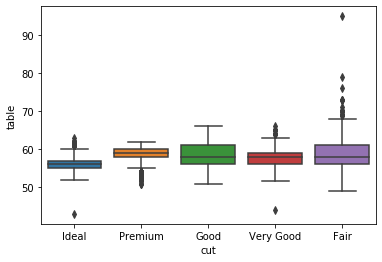

In [19]:
## plot boxplots with categorical variable cut
sns.boxplot(x='cut',y='table',data = diamond)

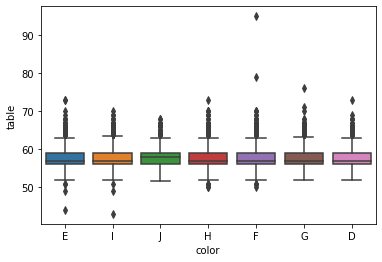

In [20]:
## plot boxplots with categorical variable color
sns.boxplot(x='color',y='table',data = diamond)

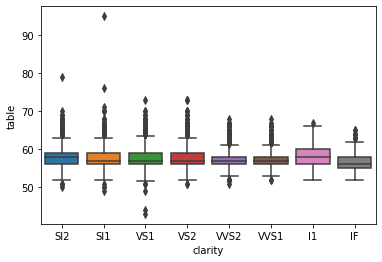

In [21]:
## plot boxplots with categorical variable clarity
sns.boxplot(x='clarity',y='table',data = diamond)

From above I could see that the table seems has no relation with color because different colors have almost the same table mean. The diamond with Premium cut has the highest mean of table, the diamond with Ideal cut has the lowest mean of table. And the diamond with I1 clarity has the highest mean of table.

In [22]:
## Group the numeric variables by categorical variables 
data_group = diamond[['cut','clarity','table']]
grouped_avg = data_group.groupby(['cut','clarity'],as_index=False).mean()
grouped_avg

,cut,clarity,table
0,Fair,I1,58.114286
1,Fair,IF,59.111111
2,Fair,SI1,59.126961
3,Fair,SI2,58.828326
4,Fair,VS1,60.365294
5,Fair,VS2,59.050958
6,Fair,VVS1,61.235294
7,Fair,VVS2,59.237681
8,Good,I1,59.497917
9,Good,IF,59.056338


I see from above that the diamond with Cut Fair and clarity VVS1 has the highest table 61.235294, the diamond with Cut Ideal and clarity IF has the lowest price 55.707013.

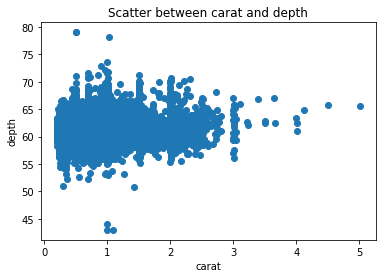

In [23]:
## Scatter plots between carat and depth
x = diamond['carat']
y = diamond['depth']
plt.scatter(x,y)
plt.title('Scatter between carat and depth')
plt.xlabel('carat')
plt.ylabel('depth')
plt.show()

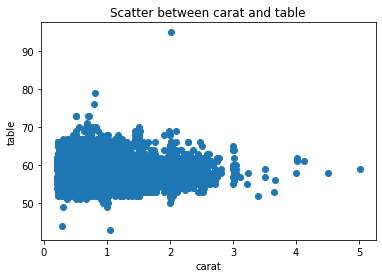

In [24]:
## Scatter plots between carat and table
x = diamond['carat']
y = diamond['table']
plt.scatter(x,y)
plt.title('Scatter between carat and table')
plt.xlabel('carat')
plt.ylabel('table')
plt.show()

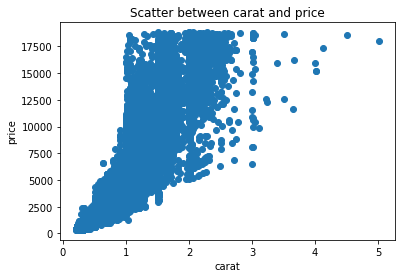

In [25]:
## Scatter plots between carat and price
x = diamond['carat']
y = diamond['price']
plt.scatter(x,y)
plt.title('Scatter between carat and price')
plt.xlabel('carat')
plt.ylabel('price')
plt.show()

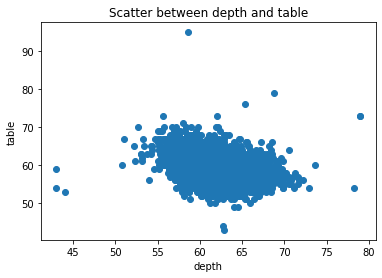

In [26]:
## Scatter plots between depth and table
x = diamond['depth']
y = diamond['table']
plt.scatter(x,y)
plt.title('Scatter between depth and table')
plt.xlabel('depth')
plt.ylabel('table')
plt.show()

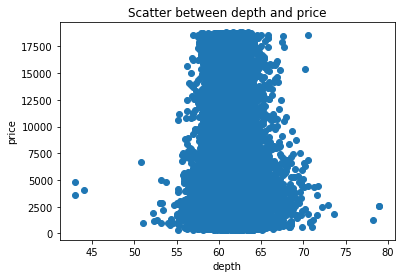

In [27]:
## Scatter plots between depth and price
x = diamond['depth']
y = diamond['price']
plt.scatter(x,y)
plt.title('Scatter between depth and price')
plt.xlabel('depth')
plt.ylabel('price')
plt.show()

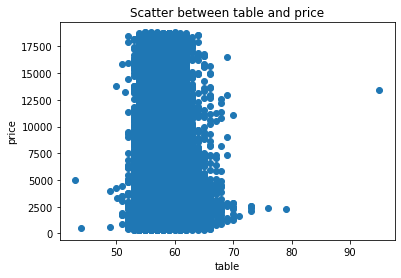

In [28]:
## Scatter plots between table and price
x = diamond['table']
y = diamond['price']
plt.scatter(x,y)
plt.title('Scatter between table and price')
plt.xlabel('table')
plt.ylabel('price')
plt.show()

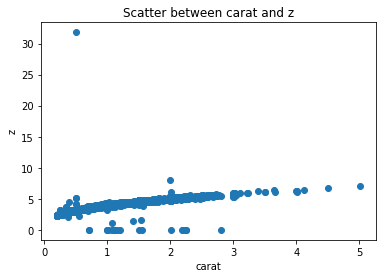

In [29]:
## Scatter plots between carat and z
x = diamond['carat']
y = diamond['z']
plt.scatter(x,y)
plt.title('Scatter between carat and z')
plt.xlabel('carat')
plt.ylabel('z')
plt.show()

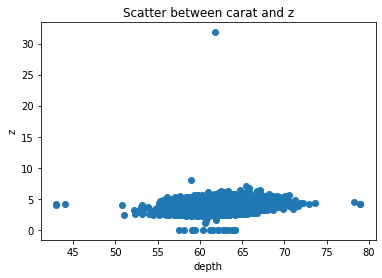

In [30]:
## Scatter plots between depth and z
x = diamond['depth']
y = diamond['z']
plt.scatter(x,y)
plt.title('Scatter between carat and z')
plt.xlabel('depth')
plt.ylabel('z')
plt.show()

From the scatter plots, I found that Carat 1 and 2 have most depth of 55-65, carat 0-3 have most table of 50-70, carat 1 has largest range of price, with carat increasing, the range of price is decreasing, the bigger carat is, the higher the price is. There is a cluster between depth and table. All kinds of depth has the same range of price, all kinds of table has the same range of price. The relationship between carat and z is linear with lots of outliers. z between 2-6 has largest range of depth.

## Data Preparation and EDA Review - Deal with outliers, remove invalid values, transform the data

In [31]:
#check for number of outliers in carat, depth and price:
columns=diamondn.columns.tolist()
#check for number of outliers per column
for k in columns:
    IQ3=diamondn[k].quantile(0.75)
    IQ1=diamondn[k].quantile(0.25)
    IQR=(IQ3-IQ1)*1.5
    print('Number of outliers for variable %s:' %k, 
          diamondn.shape[0]-diamondn[((diamondn[k]>=(IQ1-IQR)) & (diamondn[k]<=(IQ3+IQR)))].shape[0])

Number of outliers for variable carat: 1889
Number of outliers for variable depth: 2545
Number of outliers for variable table: 605
Number of outliers for variable price: 3540
Number of outliers for variable x: 32
Number of outliers for variable y: 29
Number of outliers for variable z: 49


My idea is not to deal with outliers in this project, 

Because the largest proportion of outliers exist in variable "price", some diamonds may be very precious so as to have very high price, the outliers are reasonable. 

Other variables do not have such large proportion of outliers, they may not have hugh impact on the data.

#### I will now eliminate invalid data:

In [32]:
#copy the data frame 
diamond2=diamond.copy()

#remove rows that have a x equals to 0
diamond2=diamond2[diamond2['x']!=0]

#remove rows that have a y equals to 0
diamond2=diamond2[diamond2['y']!=0]

#remove rows that have a z equals to 0
diamond2=diamond2[diamond2['z']!=0]

#check shape
diamond2.shape

(53920, 10)

Since most features are not normally distributed, I will convert them to log:

In [33]:
diamond2['table'] = np.log(diamond2.table)
diamond2['table'].describe()

count    53920.000000
mean         4.050291
std          0.038402
min          3.761200
25%          4.025352
50%          4.043051
75%          4.077537
max          4.553877
Name: table, dtype: float64

In [34]:
diamond2['depth'] = np.log(diamond2.depth)
diamond2['depth'].describe()

count    53920.000000
mean         4.122816
std          0.023268
min          3.761200
25%          4.110874
50%          4.123903
75%          4.135167
max          4.369448
Name: depth, dtype: float64

In [35]:
diamond2['price'] = np.log(diamond2.price)
diamond2['price'].describe()

count    53920.000000
mean         7.786393
std          1.014540
min          5.786897
25%          6.855409
50%          7.783641
75%          8.579839
max          9.842835
Name: price, dtype: float64

In [36]:
diamond2['x'] = np.log(diamond2.x)
diamond2['x'].describe()

count    53920.000000
mean         1.727174
std          0.193699
min          1.316408
25%          1.549688
50%          1.740466
75%          1.877937
max          2.373975
Name: x, dtype: float64

In [37]:
diamond2['y'] = np.log(diamond2.y)
diamond2['y'].describe()

count    53920.000000
mean         1.727840
std          0.192686
min          1.302913
25%          1.551809
50%          1.742219
75%          1.877937
max          4.075841
Name: y, dtype: float64

In [38]:
diamond2['z'] = np.log(diamond2.z)
diamond2['z'].describe()

count    53920.000000
mean         1.245163
std          0.194207
min          0.067659
25%          1.068153
50%          1.261298
75%          1.396245
max          3.459466
Name: z, dtype: float64

Then I will plot histograms and boxplots again to check whether revomal of invalid data changed the distribution of the data:

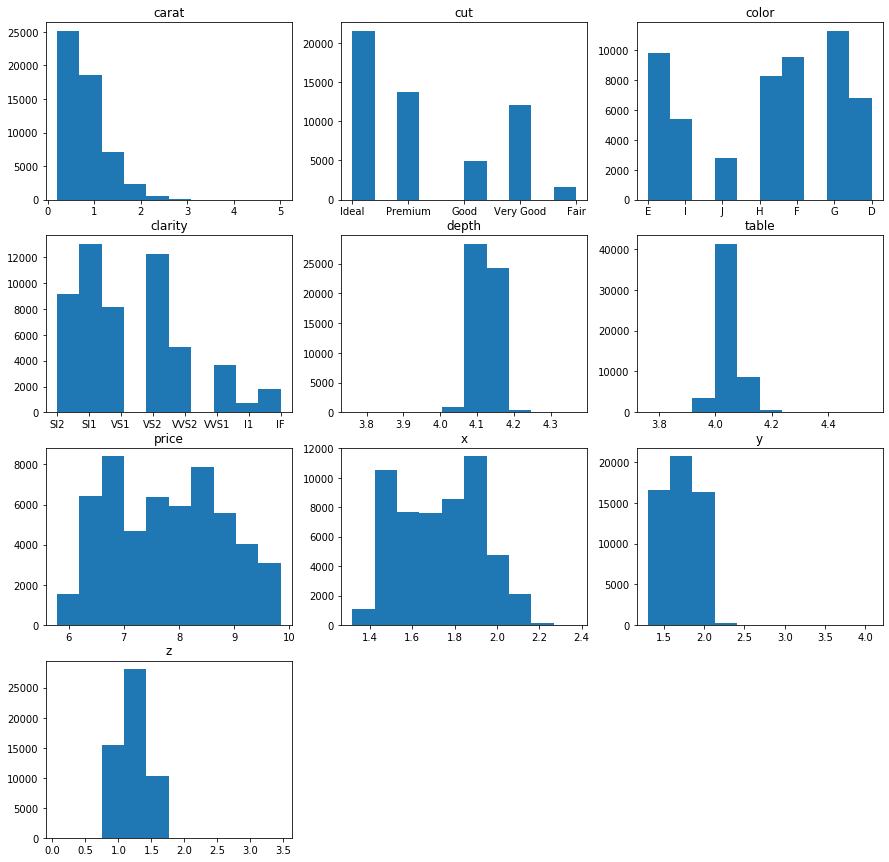

In [39]:
#define a figure to which we will add a histogram for each of our attributes
plt.figure(figsize=(15,15))

i=1
columns=diamond2.columns.tolist()
for k in columns[0:] :  
    plt.subplot(4,3,i) 
    plt.hist(diamond2[k])
    plt.title('%s' %k)
    i=i+1

#show results    
plt.show()

Some numeric variables have become normally distributed.

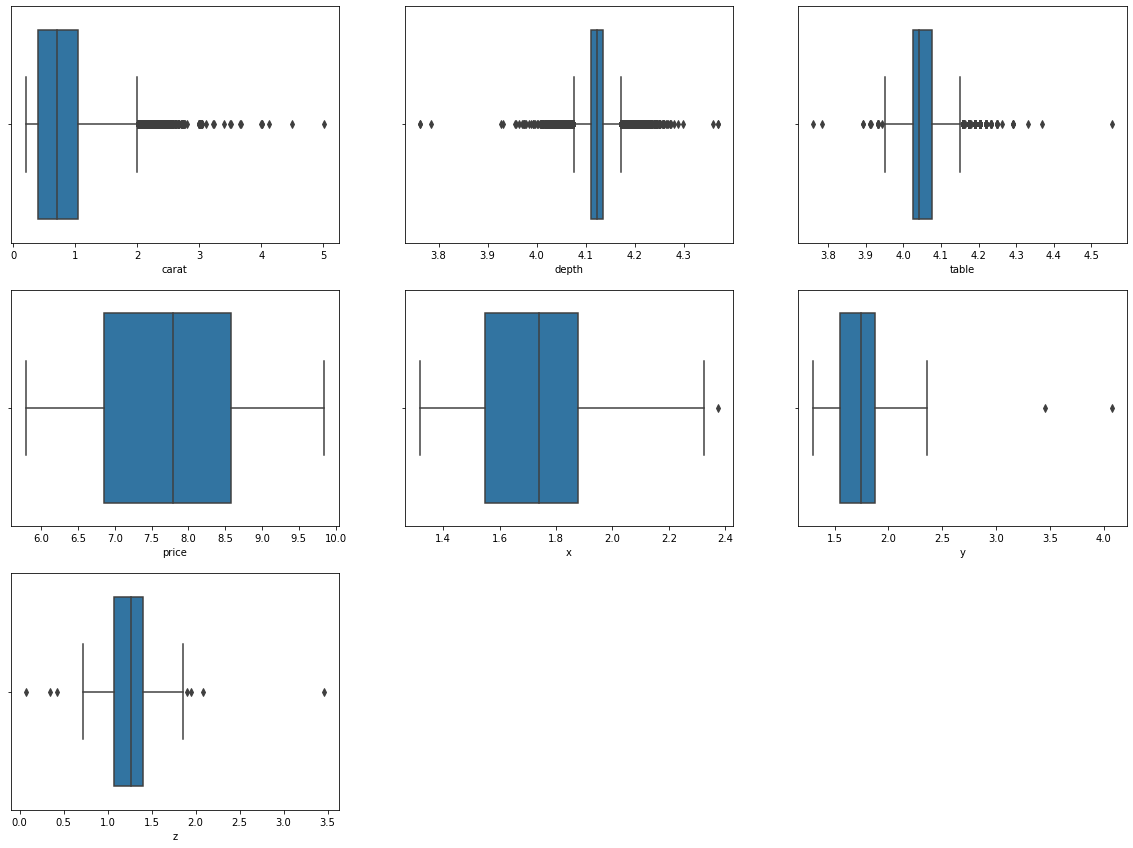

In [40]:
#define a figure to which we will add boxplots of each attribute.
plt.figure(figsize=(20,20))

diamond2n = diamond2[['carat','depth','table','price','x','y','z']]
i=1
columns=diamond2n.columns.tolist()
for k in columns[0:] :   
    plt.subplot(4,3,i) 
    sns.boxplot(x=k,data=diamond2n)
    i=i+1 

#show results
plt.show()

From boxplots I could see that transformations makes the boxplots better.

Next, I will convert cut column values from ['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'] to [0,1,2,3,4], convert color column values from ['E', 'I', 'J', 'H', 'F', 'G', 'D'] to [0,1,2,3,4,5,6], convert clarity column values from ['SI2', 'SI1', 'VS2', 'VVS2', 'VVS1', 'VS1', 'I1', 'IF'] to [0,1,2,3,4,5,6,7].

In [41]:
#Creating the dependent variable class
factor = pd.factorize(diamond2['cut'])
diamond2.cut = factor[0]
definitions = factor[1]
print(diamond2.cut.head())
print(definitions)

0    0
1    1
2    2
3    1
4    2
Name: cut, dtype: int64
Index(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype='object')


In [42]:
#Creating the dependent variable class
factor = pd.factorize(diamond2['color'])
diamond2.color = factor[0]
definitions = factor[1]
print(diamond2.color.head())
print(definitions)

0    0
1    0
2    0
3    1
4    2
Name: color, dtype: int64
Index(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype='object')


In [43]:
#Creating the dependent variable class
factor = pd.factorize(diamond2['clarity'])
diamond2.clarity = factor[0]
definitions = factor[1]
print(diamond2.clarity.head())
print(definitions)

0    0
1    1
2    2
3    3
4    0
Name: clarity, dtype: int64
Index(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'], dtype='object')


Next I will create a dataset that is ready to be used for a model.

In [44]:
#create a dataset that is ready to be used for a model
target = diamond2['cut']
explanatory=diamond2[['color','clarity','carat','depth','table','price','x','y','z']]
diamondd=pd.concat([target,explanatory],axis=1)

#check results
diamondd.shape

(53920, 10)

In [45]:
#double check that there are no null values in these columns
diamondd.isnull().sum()

cut        0
color      0
clarity    0
carat      0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

## Feature Selection

### Does the cut attribute exhibit low entropy or high entropy?

In [46]:
diamondd['cut'].value_counts() 

0    21548
1    13780
3    12081
2     4902
4     1609
Name: cut, dtype: int64

In [47]:
# calculate the entropy for cut
from math import log2
# proportion of examples in each class
class0 = 21548/53920
class1 = 13780/53920
class2 = 12081/53920
class3 = 4902/53920
class4 = 1609/53920
# calculate entropy
entropy = -(class0 * log2(class0) + class1 * log2(class1) + class2 * log2(class2) + class3 * log2(class3) + class4 * log2(class4))
# print the result
print('entropy of cut: %.3f bits' % entropy)

entropy of cut: 1.981 bits


More than 39% of the values contained within the cut attribute are indicative of an "Ideal" cut. From calculation, it shows the target attribute has  __high entropy__.

#### So which explanatory attributes offered high information gain + low entropy? I will use mutual information feature selection method and calculate entropy and gain information to find it:

For convenience to calculate information gain for numeric variables, I will set the bin to 3.

In [48]:
diamondd['table'].value_counts(bins=3)

(4.025, 4.29]     34030
(3.759, 4.025]    19883
(4.29, 4.554]         7
Name: table, dtype: int64

In [49]:
# calculate the entropy for table
from math import log2
# proportion of examples in each class
class0 = 49102/53920
class1 = 4816/53920
class2 = 2/53920
# calculate entropy
entropy = -(class0 * log2(class0) + class1 * log2(class1) + class2 * log2(class2))
# print the result
print('entropy of table: %.3f bits' % entropy)

entropy of table: 0.435 bits


In [50]:
diamondd['depth'].value_counts(bins=3)

(3.964, 4.167]                 52696
(4.167, 4.369]                  1217
(3.7600000000000002, 3.964]        7
Name: depth, dtype: int64

In [51]:
# calculate the entropy for depth
from math import log2
# proportion of examples in each class
class0 = 53727/53920
class1 = 169/53920
class2 = 24/53920
# calculate entropy
entropy = -(class0 * log2(class0) + class1 * log2(class1) + class2 * log2(class2))
# print the result
print('entropy of depth: %.3f bits' % entropy)

entropy of depth: 0.036 bits


In [52]:
diamondd['price'].value_counts(bins=3)

(7.139, 8.491]    20490
(5.782, 7.139]    18201
(8.491, 9.843]    15229
Name: price, dtype: int64

In [53]:
# calculate the entropy for price
from math import log2
# proportion of examples in each class
class0 = 43579/53920
class1 = 7346/53920
class2 = 2995/53920
# calculate entropy
entropy = -(class0 * log2(class0) + class1 * log2(class1) + class2 * log2(class2))
# print the result
print('entropy of price: %.3f bits' % entropy)

entropy of price: 0.872 bits


In [54]:
diamondd['x'].value_counts(bins=3)

(1.669, 2.021]    27780
(1.314, 1.669]    22893
(2.021, 2.374]     3247
Name: x, dtype: int64

In [55]:
# calculate the entropy for x
from math import log2
# proportion of examples in each class
class0 = 32152/53920
class1 = 21336/53920
class2 = 432/53920
# calculate entropy
entropy = -(class0 * log2(class0) + class1 * log2(class1) + class2 * log2(class2))
# print the result
print('entropy of x: %.3f bits' % entropy)

entropy of x: 1.030 bits


In [56]:
diamondd['y'].value_counts(bins=3)

(1.2990000000000002, 2.227]    53898
(2.227, 3.152]                    20
(3.152, 4.076]                     2
Name: y, dtype: int64

In [57]:
# calculate the entropy for y
from math import log2
# proportion of examples in each class
class0 = 53918/53920
class1 = 1/53920
class2 = 1/53920
# calculate entropy
entropy = -(class0 * log2(class0) + class1 * log2(class1) + class2 * log2(class2))
# print the result
print('entropy of y: %.3f bits' % entropy)

entropy of y: 0.001 bits


In [58]:
diamondd['z'].value_counts(bins=3)

(1.198, 2.329]     29992
(0.0633, 1.198]    23927
(2.329, 3.459]         1
Name: z, dtype: int64

In [59]:
# calculate the entropy for z
from math import log2
# proportion of examples in each class
class0 = 53919/53920
class1 = 1/53920
# calculate entropy
entropy = -(class0 * log2(class0) + class1 * log2(class1))
# print the result
print('entropy of z: %.3f bits' % entropy)

entropy of z: 0.000 bits


In [60]:
diamondd['color'].value_counts(bins=3)

(4.0, 6.0]       18058
(-0.007, 2.0]    18026
(2.0, 4.0]       17836
Name: color, dtype: int64

In [61]:
# calculate the entropy for color
from math import log2
# proportion of examples in each class
class0 = 18058/53920
class1 = 18026/53920
class2 = 17836/53920
# calculate entropy
entropy = -(class0 * log2(class0) + class1 * log2(class1) + class2 * log2(class2))
# print the result
print('entropy of color: %.3f bits' % entropy)

entropy of color: 1.585 bits


In [62]:
diamondd['clarity'].value_counts(bins=3)

(-0.008, 2.333]    30418
(2.333, 4.667]     17320
(4.667, 7.0]        6182
Name: clarity, dtype: int64

In [63]:
# calculate the entropy for clarity
from math import log2
# proportion of examples in each class
class0 = 30418/53920
class1 = 17320/53920
class2 = 6182/53920
# calculate entropy
entropy = -(class0 * log2(class0) + class1 * log2(class1) + class2 * log2(class2))
# print the result
print('entropy of clarity: %.3f bits' % entropy)

entropy of clarity: 1.350 bits


In [64]:
diamondd['cut'].value_counts(bins=4)

(-0.005, 1.0]    35328
(2.0, 3.0]       12081
(1.0, 2.0]        4902
(3.0, 4.0]        1609
Name: cut, dtype: int64

In [65]:
# calculate the entropy for cut
from math import log2
# proportion of examples in each class
class0 = 35328/53920
class1 = 12081/53920
class2 = 4902/53920
class3 = 1609/53920
# calculate entropy
entropy = -(class0 * log2(class0) + class1 * log2(class1) + class2 * log2(class2) + class3 * log2(class3))
# print the result
print('entropy of cut: %.3f bits' % entropy)

entropy of cut: 1.349 bits


Calculate information gain for each variables:

In [66]:
## Calculate number of table in different categories
def counttable1(s,t):
    return ((s > 3.759) & (s <= 4.025) & (t > -0.005) & (t <= 1.0)).sum()
def counttable2(s,t):
    return ((s > 3.759) & (s <= 4.025) & (t > 1.0) & (t <= 2.0)).sum()
def counttable3(s,t):
    return ((s > 3.759) & (s <= 4.025) & (t > 2.0) & (t <= 3.0)).sum()
def counttable4(s,t):
    return ((s > 3.759) & (s <= 4.025) & (t > 3.0) & (t <= 4.0)).sum()
def counttable11(s,t):
    return ((s > 4.025) & (s <= 4.29) & (t > -0.005) & (t <= 1.0)).sum()
def counttable22(s,t):
    return ((s > 4.025) & (s <= 4.29) & (t > 1.0) & (t <= 2.0)).sum()
def counttable33(s,t):
    return ((s > 4.025) & (s <= 4.29) & (t > 2.0) & (t <= 3.0)).sum()
def counttable44(s,t):
    return ((s > 4.025) & (s <= 4.29) & (t > 3.0) & (t <= 4.0)).sum()
def counttable111(s,t):
    return ((s > 4.29) & (s <= 4.554) & (t > -0.005) & (t <= 1.0)).sum()
def counttable222(s,t):
    return ((s > 4.29) & (s <= 4.554) & (t > 1.0) & (t <= 2.0)).sum()
def counttable333(s,t):
    return ((s > 4.29) & (s <= 4.554) & (t > 2.0) & (t <= 3.0)).sum()
def counttable444(s,t):
    return ((s > 4.29) & (s <= 4.554) & (t > 3.0) & (t <= 4.0)).sum()

In [67]:
counttable1(diamondd['table'],diamondd['cut'])

7748

In [68]:
counttable2(diamondd['table'],diamondd['cut'])

634

In [69]:
counttable3(diamondd['table'],diamondd['cut'])

1395

In [70]:
counttable4(diamondd['table'],diamondd['cut'])

227

In [71]:
counttable11(diamondd['table'],diamondd['cut'])

27580

In [72]:
counttable22(diamondd['table'],diamondd['cut'])

4268

In [73]:
counttable33(diamondd['table'],diamondd['cut'])

10686

In [74]:
counttable44(diamondd['table'],diamondd['cut'])

1375

In [75]:
counttable111(diamondd['table'],diamondd['cut'])

0

In [76]:
counttable222(diamondd['table'],diamondd['cut'])

0

In [77]:
counttable333(diamondd['table'],diamondd['cut'])

0

In [78]:
counttable444(diamondd['table'],diamondd['cut'])

7

In [79]:
## Calculate number of depth in different categories
def countdepth1(a,b):
    return ((a > 3.7600000000000002) & (a <= 3.964) & (b > -0.005) & (b <= 1.0)).sum()
def countdepth2(a,b):
    return ((a > 3.7600000000000002) & (a <= 3.964) & (b > 1.0) & (b <= 2.0)).sum()
def countdepth3(a,b):
    return ((a > 3.7600000000000002) & (a <= 3.964) & (b > 2.0) & (b <= 3.0)).sum()
def countdepth4(a,b):
    return ((a > 3.7600000000000002) & (a <= 3.964) & (b > 3.0) & (b <= 4.0)).sum()
def countdepth11(a,b):
    return ((a > 3.964) & (a <= 4.167) & (b > -0.005) & (b <= 1.0)).sum()
def countdepth22(a,b):
    return ((a > 3.964) & (a <= 4.167) & (b > 1.0) & (b <= 2.0)).sum()
def countdepth33(a,b):
    return ((a > 3.964) & (a <= 4.167) & (b > 2.0) & (b <= 3.0)).sum()
def countdepth44(a,b):
    return ((a > 3.964) & (a <= 4.167) & (b > 3.0) & (b <= 4.0)).sum()
def countdepth111(a,b):
    return ((a > 4.167) & (a <= 4.369) & (b > -0.005) & (b <= 1.0)).sum()
def countdepth222(a,b):
    return ((a > 4.167) & (a <= 4.369) & (b > 1.0) & (b <= 2.0)).sum()
def countdepth333(a,b):
    return ((a > 4.167) & (a <= 4.369) & (b > 2.0) & (b <= 3.0)).sum()
def countdepth444(a,b):
    return ((a > 4.167) & (a <= 4.369) & (b > 3.0) & (b <= 4.0)).sum()

In [80]:
countdepth1(diamondd['depth'],diamondd['cut'])

1

In [81]:
countdepth2(diamondd['depth'],diamondd['cut'])

0

In [82]:
countdepth3(diamondd['depth'],diamondd['cut'])

0

In [83]:
countdepth4(diamondd['depth'],diamondd['cut'])

6

In [84]:
countdepth11(diamondd['depth'],diamondd['cut'])

35315

In [85]:
countdepth22(diamondd['depth'],diamondd['cut'])

4789

In [86]:
countdepth33(diamondd['depth'],diamondd['cut'])

12075

In [87]:
countdepth44(diamondd['depth'],diamondd['cut'])

517

In [88]:
countdepth111(diamondd['depth'],diamondd['cut'])

12

In [89]:
countdepth222(diamondd['depth'],diamondd['cut'])

113

In [90]:
countdepth333(diamondd['depth'],diamondd['cut'])

6

In [91]:
countdepth444(diamondd['depth'],diamondd['cut'])

1084

In [92]:
## Calculate number of price in different categories
def countprice1(c,d):
    return ((c > 5.782) & (c <= 7.139) & (d > -0.005) & (d <= 1.0)).sum()
def countprice2(c,d):
    return ((c > 5.782) & (c <= 7.139) & (d > 1.0) & (d <= 2.0)).sum()
def countprice3(c,d):
    return ((c > 5.782) & (c <= 7.139) & (d > 2.0) & (d <= 3.0)).sum()
def countprice4(c,d):
    return ((c > 5.782) & (c <= 7.139) & (d > 3.0) & (d <= 4.0)).sum()
def countprice11(c,d):
    return ((c > 7.139) & (c <= 8.491) & (d > -0.005) & (d <= 1.0)).sum()
def countprice22(c,d):
    return ((c > 7.139) & (c <= 8.491) & (d > 1.0) & (d <= 2.0)).sum()
def countprice33(c,d):
    return ((c > 7.139) & (c <= 8.491) & (d > 2.0) & (d <= 3.0)).sum()
def countprice44(c,d):
    return ((c > 7.139) & (c <= 8.491) & (d > 3.0) & (d <= 4.0)).sum()
def countprice111(c,d):
    return ((c > 8.491) & (c <= 9.843) & (d > -0.005) & (d <= 1.0)).sum()
def countprice222(c,d):
    return ((c > 8.491) & (c <= 9.843) & (d > 1.0) & (d <= 2.0)).sum()
def countprice333(c,d):
    return ((c > 8.491) & (c <= 9.843) & (d > 2.0) & (d <= 3.0)).sum()
def countprice444(c,d):
    return ((c > 8.491) & (c <= 9.843) & (d > 3.0) & (d <= 4.0)).sum()

In [93]:
countprice1(diamondd['price'],diamondd['cut'])

12864

In [94]:
countprice2(diamondd['price'],diamondd['cut'])

1349

In [95]:
countprice3(diamondd['price'],diamondd['cut'])

3775

In [96]:
countprice4(diamondd['price'],diamondd['cut'])

213

In [97]:
countprice11(diamondd['price'],diamondd['cut'])

12446

In [98]:
countprice22(diamondd['price'],diamondd['cut'])

2261

In [99]:
countprice33(diamondd['price'],diamondd['cut'])

4833

In [100]:
countprice44(diamondd['price'],diamondd['cut'])

950

In [101]:
countprice111(diamondd['price'],diamondd['cut'])

10018

In [102]:
countprice222(diamondd['price'],diamondd['cut'])

1292

In [103]:
countprice333(diamondd['price'],diamondd['cut'])

3473

In [104]:
countprice444(diamondd['price'],diamondd['cut'])

446

In [105]:
## Calculate number of x in different categories
def countx1(e,f):
    return ((e > 1.314) & (e <= 1.669) & (f > -0.005) & (f <= 1.0)).sum()
def countx2(e,f):
    return ((e > 1.314) & (e <= 1.669) & (f > 1.0) & (f <= 2.0)).sum()
def countx3(e,f):
    return ((e > 1.314) & (e <= 1.669) & (f > 2.0) & (f <= 3.0)).sum()
def countx4(e,f):
    return ((e > 1.314) & (e <= 1.669) & (f > 3.0) & (f <= 4.0)).sum()
def countx11(e,f):
    return ((e > 1.669) & (e <= 2.021) & (f > -0.005) & (f <= 1.0)).sum()
def countx22(e,f):
    return ((e > 1.669) & (e <= 2.021) & (f > 1.0) & (f <= 2.0)).sum()
def countx33(e,f):
    return ((e > 1.669) & (e <= 2.021) & (f > 2.0) & (f <= 3.0)).sum()
def countx44(e,f):
    return ((e > 1.669) & (e <= 2.021) & (f > 3.0) & (f <= 4.0)).sum()
def countx111(e,f):
    return ((e > 2.021) & (e <= 2.374) & (f > -0.005) & (f <= 1.0)).sum()
def countx222(e,f):
    return ((e > 2.021) & (e <= 2.374) & (f > 1.0) & (f <= 2.0)).sum()
def countx333(e,f):
    return ((e > 2.021) & (e <= 2.374) & (f > 2.0) & (f <= 3.0)).sum()
def countx444(e,f):
    return ((e > 2.021) & (e <= 2.374) & (f > 3.0) & (f <= 4.0)).sum()

In [106]:
countx1(diamondd['x'],diamondd['cut'])

16331

In [107]:
countx2(diamondd['x'],diamondd['cut'])

1654

In [108]:
countx3(diamondd['x'],diamondd['cut'])

4681

In [109]:
countx4(diamondd['x'],diamondd['cut'])

227

In [110]:
countx11(diamondd['x'],diamondd['cut'])

16866

In [111]:
countx22(diamondd['x'],diamondd['cut'])

2969

In [112]:
countx33(diamondd['x'],diamondd['cut'])

6748

In [113]:
countx44(diamondd['x'],diamondd['cut'])

1197

In [114]:
countx111(diamondd['x'],diamondd['cut'])

2131

In [115]:
countx222(diamondd['x'],diamondd['cut'])

279

In [116]:
countx333(diamondd['x'],diamondd['cut'])

652

In [117]:
countx444(diamondd['x'],diamondd['cut'])

185

In [118]:
## Calculate number of y in different categories
def county1(g,h):
    return ((g > 1.2990000000000002) & (g <= 2.227) & (h > -0.005) & (h <= 1.0)).sum()
def county2(g,h):
    return ((g > 1.2990000000000002) & (g <= 2.227) & (h > 1.0) & (h <= 2.0)).sum()
def county3(g,h):
    return ((g > 1.2990000000000002) & (g <= 2.227) & (h > 2.0) & (h <= 3.0)).sum()
def county4(g,h):
    return ((g > 1.2990000000000002) & (g <= 2.227) & (h > 3.0) & (h <= 4.0)).sum()
def county11(g,h):
    return ((g > 2.227) & (g <= 3.152) & (h > -0.005) & (h <= 1.0)).sum()
def county22(g,h):
    return ((g > 2.227) & (g <= 3.152) & (h > 1.0) & (h <= 2.0)).sum()
def county33(g,h):
    return ((g > 2.227) & (g <= 3.152) & (h > 2.0) & (h <= 3.0)).sum()
def county44(g,h):
    return ((g > 2.227) & (g <= 3.152) & (h > 3.0) & (h <= 4.0)).sum()
def county111(g,h):
    return ((g > 3.152) & (g <= 4.076) & (h > -0.005) & (h <= 1.0)).sum()
def county222(g,h):
    return ((g > 3.152) & (g <= 4.076) & (h > 1.0) & (h <= 2.0)).sum()
def county333(g,h):
    return ((g > 3.152) & (g <= 4.076) & (h > 2.0) & (h <= 3.0)).sum()
def county444(g,h):
    return ((g > 3.152) & (g <= 4.076) & (h > 3.0) & (h <= 4.0)).sum()

In [119]:
county1(diamondd['y'],diamondd['cut'])

35315

In [120]:
county2(diamondd['y'],diamondd['cut'])

4900

In [121]:
county3(diamondd['y'],diamondd['cut'])

12080

In [122]:
county4(diamondd['y'],diamondd['cut'])

1603

In [123]:
county11(diamondd['y'],diamondd['cut'])

11

In [124]:
county22(diamondd['y'],diamondd['cut'])

2

In [125]:
county33(diamondd['y'],diamondd['cut'])

1

In [126]:
county44(diamondd['y'],diamondd['cut'])

6

In [127]:
county111(diamondd['y'],diamondd['cut'])

2

In [128]:
county222(diamondd['y'],diamondd['cut'])

0

In [129]:
county333(diamondd['y'],diamondd['cut'])

0

In [130]:
county444(diamondd['y'],diamondd['cut'])

0

In [131]:
## Calculate number of z in different categories
def countz1(i,j):
    return ((i > 0.0633) & (i <= 1.198) & (j > -0.005) & (j <= 1.0)).sum()
def countz2(i,j):
    return ((i > 0.0633) & (i <= 1.198) & (j > 1.0) & (j <= 2.0)).sum()
def countz3(i,j):
    return ((i > 0.0633) & (i <= 1.198) & (j > 2.0) & (j <= 3.0)).sum()
def countz4(i,j):
    return ((i > 0.0633) & (i <= 1.198) & (j > 3.0) & (j <= 4.0)).sum()
def countz11(i,j):
    return ((i > 1.198) & (i <= 2.329) & (j > -0.005) & (j <= 1.0)).sum()
def countz22(i,j):
    return ((i > 1.198) & (i <= 2.329) & (j > 1.0) & (j <= 2.0)).sum()
def countz33(i,j):
    return ((i > 1.198) & (i <= 2.329) & (j > 2.0) & (j <= 3.0)).sum()
def countz44(i,j):
    return ((i > 1.198) & (i <= 2.329) & (j > 3.0) & (j <= 4.0)).sum()
def countz111(i,j):
    return ((i > 2.329) & (i <= 3.459) & (j > -0.005) & (j <= 1.0)).sum()
def countz222(i,j):
    return ((i > 2.329) & (i <= 3.459) & (j > 1.0) & (j <= 2.0)).sum()
def countz333(i,j):
    return ((i > 2.329) & (i <= 3.459) & (j > 2.0) & (j <= 3.0)).sum()
def countz444(i,j):
    return ((i > 2.329) & (i <= 3.459) & (j > 3.0) & (j <= 4.0)).sum()

In [132]:
countz1(diamondd['z'],diamondd['cut'])

17165

In [133]:
countz2(diamondd['z'],diamondd['cut'])

1711

In [134]:
countz3(diamondd['z'],diamondd['cut'])

4813

In [135]:
countz4(diamondd['z'],diamondd['cut'])

238

In [136]:
countz11(diamondd['z'],diamondd['cut'])

18163

In [137]:
countz22(diamondd['z'],diamondd['cut'])

3191

In [138]:
countz33(diamondd['z'],diamondd['cut'])

7267

In [139]:
countz44(diamondd['z'],diamondd['cut'])

1371

In [140]:
countz111(diamondd['z'],diamondd['cut'])

0

In [141]:
countz222(diamondd['z'],diamondd['cut'])

0

In [142]:
countz333(diamondd['z'],diamondd['cut'])

0

In [143]:
countz444(diamondd['z'],diamondd['cut'])

0

In [144]:
## Calculate number of color in different categories
def countcolor1(k,l):
    return ((k > -0.007) & (k <= 2.0) & (l > -0.005) & (l <= 1.0)).sum()
def countcolor2(k,l):
    return ((k > -0.007) & (k <= 2.0) & (l > 1.0) & (l <= 2.0)).sum()
def countcolor3(k,l):
    return ((k > -0.007) & (k <= 2.0) & (l > 2.0) & (l <= 3.0)).sum()
def countcolor4(k,l):
    return ((k > -0.007) & (k <= 2.0) & (l > 3.0) & (l <= 4.0)).sum()
def countcolor11(k,l):
    return ((k > 2.0) & (k <= 4.0) & (l > -0.005) & (l <= 1.0)).sum()
def countcolor22(k,l):
    return ((k > 2.0) & (k <= 4.0) & (l > 1.0) & (l <= 2.0)).sum()
def countcolor33(k,l):
    return ((k > 2.0) & (k <= 4.0) & (l > 2.0) & (l <= 3.0)).sum()
def countcolor44(k,l):
    return ((k > 2.0) & (k <= 4.0) & (l > 3.0) & (l <= 4.0)).sum()
def countcolor111(k,l):
    return ((k > 4.0) & (k <= 6.0) & (l > -0.005) & (l <= 1.0)).sum()
def countcolor222(k,l):
    return ((k > 4.0) & (k <= 6.0) & (l > 1.0) & (l <= 2.0)).sum()
def countcolor333(k,l):
    return ((k > 4.0) & (k <= 6.0) & (l > 2.0) & (l <= 3.0)).sum()
def countcolor444(k,l):
    return ((k > 4.0) & (k <= 6.0) & (l > 3.0) & (l <= 4.0)).sum()

In [145]:
countcolor1(diamondd['color'],diamondd['cut'])

11464

In [146]:
countcolor2(diamondd['color'],diamondd['cut'])

1762

In [147]:
countcolor3(diamondd['color'],diamondd['cut'])

4282

In [148]:
countcolor4(diamondd['color'],diamondd['cut'])

518

In [149]:
countcolor11(diamondd['color'],diamondd['cut'])

11625

In [150]:
countcolor22(diamondd['color'],diamondd['cut'])

1609

In [151]:
countcolor33(diamondd['color'],diamondd['cut'])

3987

In [152]:
countcolor44(diamondd['color'],diamondd['cut'])

615

In [153]:
countcolor111(diamondd['color'],diamondd['cut'])

12239

In [154]:
countcolor222(diamondd['color'],diamondd['cut'])

1531

In [155]:
countcolor333(diamondd['color'],diamondd['cut'])

3812

In [156]:
countcolor444(diamondd['color'],diamondd['cut'])

476

In [157]:
## Calculate number of clarity in different categories
def countclarity1(m,n):
    return ((m > -0.008) & (m <= 2.333) & (n > -0.005) & (n <= 1.0)).sum()
def countclarity2(m,n):
    return ((m > -0.008) & (m <= 2.333) & (n > 1.0) & (n <= 2.0)).sum()
def countclarity3(m,n):
    return ((m > -0.008) & (m <= 2.333) & (n > 2.0) & (n <= 3.0)).sum()
def countclarity4(m,n):
    return ((m > -0.008) & (m <= 2.333) & (n > 3.0) & (n <= 4.0)).sum()
def countclarity11(m,n):
    return ((m > 2.333) & (m <= 4.667) & (n > -0.005) & (n <= 1.0)).sum()
def countclarity22(m,n):
    return ((m > 2.333) & (m <= 4.667) & (n > 1.0) & (n <= 2.0)).sum()
def countclarity33(m,n):
    return ((m > 2.333) & (m <= 4.667) & (n > 2.0) & (n <= 3.0)).sum()
def countclarity44(m,n):
    return ((m > 2.333) & (m <= 4.667) & (n > 3.0) & (n <= 4.0)).sum()
def countclarity111(m,n):
    return ((m > 4.667) & (m <= 7.0) & (n > -0.005) & (n <= 1.0)).sum()
def countclarity222(m,n):
    return ((m > 4.667) & (m <= 7.0) & (n > 1.0) & (n <= 2.0)).sum()
def countclarity333(m,n):
    return ((m > 4.667) & (m <= 7.0) & (n > 2.0) & (n <= 3.0)).sum()
def countclarity444(m,n):
    return ((m > 4.667) & (m <= 7.0) & (n > 3.0) & (n <= 4.0)).sum()

In [158]:
countclarity1(diamondd['clarity'],diamondd['cut'])

18974

In [159]:
countclarity2(diamondd['clarity'],diamondd['cut'])

3286

In [160]:
countclarity3(diamondd['clarity'],diamondd['cut'])

7115

In [161]:
countclarity4(diamondd['clarity'],diamondd['cut'])

1043

In [162]:
countclarity11(diamondd['clarity'],diamondd['cut'])

11901

In [163]:
countclarity22(diamondd['clarity'],diamondd['cut'])

1264

In [164]:
countclarity33(diamondd['clarity'],diamondd['cut'])

3825

In [165]:
countclarity44(diamondd['clarity'],diamondd['cut'])

330

In [166]:
countclarity111(diamondd['clarity'],diamondd['cut'])

4453

In [167]:
countclarity222(diamondd['clarity'],diamondd['cut'])

352

In [168]:
countclarity333(diamondd['clarity'],diamondd['cut'])

1141

In [169]:
countclarity444(diamondd['clarity'],diamondd['cut'])

236

I can caculate the information gain of table:

In [170]:
# calculate the information gain for table
from math import log2
# proportion of examples in each class
class1 = 7748/10004
class2 = 634/10004
class3 = 1395/10004
class4 = 227/10004
# calculate entropy
entropy1 = -(class1 * log2(class1) + class2 * log2(class2) + class3 * log2(class3) + class4 * log2(class4))
# print the result
print('entropy1: %.3f bits' % entropy1)
# proportion of examples in each class
class11 = 27580/43909
class22 = 4268/43909
class33 = 10686/43909
class44 = 1375/43909
# calculate entropy
entropy2 = -(class11 * log2(class11) + class22 * log2(class2) + class33 * log2(class33) + class44 * log2(class44))
# print the result
print('entropy2: %.3f bits' % entropy2)
# proportion of examples in each class
class444 = 7/7
# calculate entropy
entropy3 = -(class444 * log2(class444))
# print the result
print('entropy3: %.3f bits' % entropy3)
final = 1.981 - (10004/53920)*entropy1 - (43909/53920)*entropy2 - (7/53920)*entropy3
print('information gain of table: %.3f bits' % final)

entropy1: 1.058 bits
entropy2: 1.461 bits
entropy3: -0.000 bits
information gain of table: 0.595 bits


I can caculate the information gain of depth:

In [171]:
# calculate the information gain for depth
from math import log2
# proportion of examples in each class
class1 = 1/7
class4 = 6/7
# calculate entropy
entropy1 = -(class1 * log2(class1) + class4 * log2(class4))
# print the result
print('entropy1: %.3f bits' % entropy1)
# proportion of examples in each class
class11 = 35315/52696
class22 = 4789/52696
class33 = 12075/52696
class44 = 517/52696
# calculate entropy
entropy2 = -(class11 * log2(class11) + class22 * log2(class22) + class33 * log2(class33) + class44 * log2(class44))
# print the result
print('entropy2: %.3f bits' % entropy2)
class111 = 12/1215
class222 = 113/1215
class333 = 6/1215
class444 = 1084/1215
# calculate entropy
entropy3 = -(class111 * log2(class111) + class222 * log2(class222) + class333 * log2(class333) + class444 * log2(class444))
# print the result
print('entropy3: %.3f bits' % entropy3)
final = 1.981 - (7/53920)*entropy1 - (52696/53920)*entropy2 - (1217/53920)*entropy3
print('information gain of depth: %.3f bits' % final)

entropy1: 0.592 bits
entropy2: 1.254 bits
entropy3: 0.569 bits
information gain of depth: 0.743 bits


I can caculate the information gain of price:

In [172]:
# calculate the information gain for price
from math import log2
# proportion of examples in each class
class1 = 2687/3472
class2 = 236/3472
class3 = 446/3472
class4 = 103/3472
# calculate entropy
entropy1 = -(class1 * log2(class1) + class2 * log2(class2) + class3 * log2(class3) + class4 * log2(class4))
# print the result
print('entropy1: %.3f bits' % entropy1)
# proportion of examples in each class
class11 = 32641/50440
class22 = 4666/50440
class33 = 11635/50440
class44 = 1498/50440
# calculate entropy
entropy2 = -(class11 * log2(class11) + class22 * log2(class2) + class33 * log2(class33) + class44 * log2(class44))
# print the result
print('entropy2: %.3f bits' % entropy2)
# proportion of examples in each class
class444 = 7/7
# calculate entropy
entropy3 = -(class444 * log2(class444))
# print the result
print('entropy3: %.3f bits' % entropy3)
final = 1.981 - (3472/53920)*entropy1 - (50440/53920)*entropy2 - (7/53920)*entropy3
print('information gain of price: %.3f bits' % final)

entropy1: 1.081 bits
entropy2: 1.404 bits
entropy3: -0.000 bits
information gain of price: 0.598 bits


I can caculate the information gain of x:

In [173]:
# calculate the information gain for x
from math import log2
# proportion of examples in each class
class1 = 16331/22893
class2 = 1654/22893
class3 = 4681/22893
class4 = 227/22893
# calculate entropy
entropy1 = -(class1 * log2(class1) + class2 * log2(class2) + class3 * log2(class3) + class4 * log2(class4))
# print the result
print('entropy1: %.3f bits' % entropy1)
# proportion of examples in each class
class11 = 16866/27780
class22 = 2969/27780
class33 = 6748/27780
class44 = 1197/27780
# calculate entropy
entropy2 = -(class11 * log2(class11) + class22 * log2(class2) + class33 * log2(class33) + class44 * log2(class44))
# print the result
print('entropy2: %.3f bits' % entropy2)
# proportion of examples in each class
class111 = 2131/3247
class222 = 279/3247
class333 = 652/3247
class444 = 185/3247
# calculate entropy
entropy3 = -(class111 * log2(class111) + class222 * log2(class222) + class333 * log2(class333) + class444 * log2(class444))
# print the result
print('entropy3: %.3f bits' % entropy3)
final = 1.981 - (22893/53920)*entropy1 - (27780/53920)*entropy2 - (3247/53920)*entropy3
print('information gain of x: %.3f bits' % final)

entropy1: 1.156 bits
entropy2: 1.534 bits
entropy3: 1.404 bits
information gain of x: 0.616 bits


I can caculate the information gain of y:

In [174]:
# calculate the information gain for y
from math import log2
# proportion of examples in each class
class1 = 35315/53898
class2 = 4900/53898
class3 = 12080/53898
class4 = 1603/53898
# calculate entropy
entropy1 = -(class1 * log2(class1) + class2 * log2(class2) + class3 * log2(class3) + class4 * log2(class4))
# print the result
print('entropy1: %.3f bits' % entropy1)
# proportion of examples in each class
class11 = 11/20
class22 = 2/20
class33 = 1/20
class44 = 6/20
# calculate entropy
entropy2 = -(class11 * log2(class11) + class22 * log2(class2) + class33 * log2(class33) + class44 * log2(class44))
# print the result
print('entropy2: %.3f bits' % entropy2)
# proportion of examples in each class
class111 = 2/2
# calculate entropy
entropy3 = -(class111 * log2(class111))
# print the result
print('entropy3: %.3f bits' % entropy3)
final = 1.981 - (53898/53920)*entropy1 - (20/53920)*entropy2 - (2/53920)*entropy3
print('information gain of y: %.3f bits' % final)

entropy1: 1.349 bits
entropy2: 1.557 bits
entropy3: -0.000 bits
information gain of y: 0.632 bits


I can caculate the information gain of z:

In [175]:
# calculate the information gain for z
from math import log2
# proportion of examples in each class
class1 = 17165/23927
class2 = 1711/23927
class3 = 4813/23927
class4 = 238/23927
# calculate entropy
entropy1 = -(class1 * log2(class1) + class2 * log2(class2) + class3 * log2(class3) + class4 * log2(class4))
# print the result
print('entropy1: %.3f bits' % entropy1)
# proportion of examples in each class
class11 = 18163/29992
class22 = 3191/29992
class33 = 7267/29992
class44 = 1371/29992
# calculate entropy
entropy2 = -(class11 * log2(class11) + class22 * log2(class2) + class33 * log2(class33) + class44 * log2(class44))
# print the result
print('entropy2: %.3f bits' % entropy2)
final = 1.981 - (23927/53920)*entropy1 - (29992/53920)*entropy2
print('information gain of z: %.3f bits' % final)

entropy1: 1.147 bits
entropy2: 1.542 bits
information gain of z: 0.614 bits


I can caculate the information gain of color:

In [176]:
# calculate the information gain for color
from math import log2
# proportion of examples in each class
class1 = 11464/18058
class2 = 1762/18058
class3 = 4282/18058
class4 = 518/18058
# calculate entropy
entropy1 = -(class1 * log2(class1) + class2 * log2(class2) + class3 * log2(class3) + class4 * log2(class4))
# print the result
print('entropy1: %.3f bits' % entropy1)
# proportion of examples in each class
class11 = 11625/18026
class22 = 1609/18026
class33 = 3987/18026
class44 = 615/18026
# calculate entropy
entropy2 = -(class11 * log2(class11) + class22 * log2(class2) + class33 * log2(class33) + class44 * log2(class44))
# print the result
print('entropy2: %.3f bits' % entropy2)
# proportion of examples in each class
class111 = 12239/17836
class222 = 1531/17836
class333 = 3812/17836
class444 = 476/17836
# calculate entropy
entropy3 = -(class111 * log2(class111) + class222 * log2(class222) + class333 * log2(class333) + class444 * log2(class444))
# print the result
print('entropy3: %.3f bits' % entropy3)
final = 1.981 - (18058/53920)*entropy1 - (18026/53920)*entropy2 - (17836/53920)*entropy3
print('information gain of color: %.3f bits' % final)

entropy1: 1.383 bits
entropy2: 1.356 bits
entropy3: 1.292 bits
information gain of color: 0.637 bits


I can caculate the information gain of clarity:

In [177]:
# calculate the information gain for clarity
from math import log2
# proportion of examples in each class
class1 = 18974/30418
class2 = 3286/30418
class3 = 7115/30418
class4 = 1043/30418
# calculate entropy
entropy1 = -(class1 * log2(class1) + class2 * log2(class2) + class3 * log2(class3) + class4 * log2(class4))
# print the result
print('entropy1: %.3f bits' % entropy1)
# proportion of examples in each class
class11 = 11901/17320
class22 = 1264/17320
class33 = 3825/17320
class44 = 330/17320
# calculate entropy
entropy2 = -(class11 * log2(class11) + class22 * log2(class2) + class33 * log2(class33) + class44 * log2(class44))
# print the result
print('entropy2: %.3f bits' % entropy2)
# proportion of examples in each class
class111 = 4453/6182
class222 = 352/6182
class333 = 1141/6182
class444 = 236/6182
# calculate entropy
entropy3 = -(class111 * log2(class111) + class222 * log2(class222) + class333 * log2(class333) + class444 * log2(class444))
# print the result
print('entropy3: %.3f bits' % entropy3)
final = 1.981 - (30418/53920)*entropy1 - (17320/53920)*entropy2 - (6182/53920)*entropy3
print('information gain of clarity: %.3f bits' % final)

entropy1: 1.429 bits
entropy2: 1.196 bits
entropy3: 1.206 bits
information gain of clarity: 0.652 bits


Then I would make a table to compare their entropy and information gain:

<table>
  <thead>
    <tr>
      <th>Comparative term</th>
      <th>table </th>
      <th>depth</th>
      <th>price</th>
      <th>x</th>
      <th>y</th>
      <th>z</th>
      <th>color</th>
      <th>clarity</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>entropy</td>
      <th>0.435</th>
      <th>0.036</th>
      <th>0.872</th>
      <th>1.030</th>
      <th>0.001</th>
      <th>0.000</th>
      <th>1.585</th>
      <th>1.350</th>
    </tr>
    <tr>
      <td>information gain</td>
      <th>0.595</th>
      <th>0.743</th>
      <th>0.598</th>
      <th>0.616</th>
      <th>0.632</th>
      <th>0.614</th>
      <th>0.637</th>
      <th>0.652</th>
      </tr>
  </tbody>
</table>

From the table, for entropy: z < y < depth < table < price < x < clarity < color, for information gain: depth > clarity > color > y > z > x > price > table. 

since my aim is to find the variables with low entropy and high information gain, therefore, the variables depth, y, z and price are suitable to construct the model.

## Building Neural Network

After splitting the data into training and testing subsets, I will use the training subset to construct and train
three different Python-based feed-forward, back propagating neural network models using the explanatory variables chose above for each model.

The code and content is referenced from: [this link](https://github.com/ageron/handson-ml2/blob/master/10_neural_nets_with_keras.ipynb) and [this link](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5#:~:text=Keras%20is%20a%20simple%20tool,20%20and%204%20dimensions%20respectively.)

How to choose the activation function, what is the advantages and disadvantages of different activation function, the reference is here [this link](https://missinglink.ai/guides/neural-network-concepts/7-types-neural-network-activation-functions-right/)

### 1. The first Neural Network model with activation function ='relu'

Activation function: ReLU (Rectified Linear Unit)

**Advantages**
- ReLU allows the network to converge very quickly, ReLU allows for backpropagation

**Disadvantages**

- When inputs approach zero, the gradient of the function becomes zero, the network cannot perform backpropagation and cannot learn.

In [177]:
## Import tensorflow package
import tensorflow as tf
assert tf.__version__ >= "2.0"
from tensorflow import keras
import os
import warnings
warnings.filterwarnings(action="ignore")
# To make the output stable across runs, set a seed
np.random.seed(42)

In the following code:

- Sequential specifies to keras manifesting I am creating model sequentially, the output of each layer is the input to the next layer.

- model.add is used to add a layer to neural network. 

- The Dense is used to specify the fully connected layer.

Because there are 4 kinds of input explanatory variables, the input dimension I set is 4.

More layers, more accurate the result will be, therefore, for the first layer, I want the output layer to be 100, for the second layer I want the output layer to be 50, for the third I want the layer to be 5, because there are 5 classes - Ideal, Premium, Very Good, Good, Fair in the response attribute "cut".

In [791]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(100, input_dim=(4), activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(5, activation='relu'))

Specifying the loss function and the optimizer is from compile function in keras.

How to choose the optimizer function? According to [this link](https://ruder.io/optimizing-gradient-descent/):

"the adaptive learning-rate methods, i.e. Adagrad, Adadelta, RMSprop, and Adam are most suitable and provide the best convergence"

"bias-correction helps Adam slightly outperform RMSprop towards the end of optimization as gradients become sparser. Insofar, Adam might be the best overall choice."

Therefore, I will use Adam to be my optimizer function:

In [792]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

- Categorical_crossentropy specifies that I have multiple classes.

- The optimizer is Adam. 

- The metrics here used is accuracy

### Training model

Reference from [this link](https://machinelearningmastery.com/how-to-control-the-speed-and-stability-of-training-neural-networks-with-gradient-descent-batch-size/)
"Neural networks are trained using the stochastic gradient descent optimization algorithm. The more training examples used in the estimate, the more accurate this estimate will be and the more likely that the weights of the network will be adjusted in a way that will improve the performance of the model."

Therefore, for training the model, I will set the number of training examples as many as possible, such like 90% of the data are training samples, 10% of the data are testing samples:

In [797]:
X = diamondd[['depth','price','y','z']].values
y = diamondd['cut'].values
# Partition data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, 
                                  random_state=0, stratify=y)
y_train = keras.utils.to_categorical(y_train, 5)

[This paper](https://arxiv.org/abs/1609.04836) says having large batch would reduce the generalization ability of the model, therefore, I would choose batch_size as small as possible.

How to set epochs and batch_size? 
According to [this link](https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/) and [this link](https://machinelearningmastery.com/how-to-control-the-speed-and-stability-of-training-neural-networks-with-gradient-descent-batch-size/)

The batch size is a hyperparameter of gradient descent that controls the number of training samples to work through before the model’s internal parameters are updated.

- Batch Gradient Descent. Batch Size = Size of Training Set
- Stochastic Gradient Descent. Batch Size = 1
- Mini-Batch Gradient Descent. 1 < Batch Size < Size of Training Set

The number of epochs is a hyperparameter of gradient descent that controls the number of complete passes through the training dataset.

I will train the model using three different batches: Batch Gradient Descent, Stochastic Gradient Descent, Mini-Batch Gradient Descent, using the same number of epoch number, to see which one gives the highest accuracy 

#### 1. Stochastic Gradient Descent in Keras

In [798]:
history = model.fit(X_train, y_train, epochs=100, batch_size=1)

Epoch 1/100
48528/48528 [==============================] - 79s 2ms/step - loss: 11.8169 - accuracy: 0.2668
Epoch 2/100
48528/48528 [==============================] - 81s 2ms/step - loss: 9.6769 - accuracy: 0.3996
Epoch 3/100
48528/48528 [==============================] - 79s 2ms/step - loss: 9.6769 - accuracy: 0.3996
Epoch 4/100
48528/48528 [==============================] - 82s 2ms/step - loss: 9.6769 - accuracy: 0.3996
Epoch 5/100
48528/48528 [==============================] - 88s 2ms/step - loss: 9.6769 - accuracy: 0.3996
Epoch 6/100
48528/48528 [==============================] - 95s 2ms/step - loss: 9.6769 - accuracy: 0.3996
Epoch 7/100
48528/48528 [==============================] - 104s 2ms/step - loss: 9.6769 - accuracy: 0.3996
Epoch 8/100
48528/48528 [==============================] - 109s 2ms/step - loss: 9.6769 - accuracy: 0.3996
Epoch 9/100
48528/48528 [==============================] - 111s 2ms/step - loss: 9.6769 - accuracy: 0.3996
Epoch 10/100
48528/48528 [================

The entire process of training the neural network and evaluation of batch size of 1 took less than 90 seconds with each epoch to complete.

#### 2. Batch Gradient Descent in Keras

In [799]:
history = model.fit(X_train, y_train, epochs=100, batch_size=len(X_train))

Epoch 1/100
48528/48528 [==============================] - 0s 1us/step - loss: 9.6769 - accuracy: 0.3996
Epoch 2/100
48528/48528 [==============================] - 0s 1us/step - loss: 9.6769 - accuracy: 0.3996
Epoch 3/100
48528/48528 [==============================] - 0s 1us/step - loss: 9.6769 - accuracy: 0.3996
Epoch 4/100
48528/48528 [==============================] - 0s 1us/step - loss: 9.6769 - accuracy: 0.3996
Epoch 5/100
48528/48528 [==============================] - 0s 1us/step - loss: 9.6769 - accuracy: 0.3996
Epoch 6/100
48528/48528 [==============================] - 0s 1us/step - loss: 9.6769 - accuracy: 0.3996
Epoch 7/100
48528/48528 [==============================] - 0s 1us/step - loss: 9.6769 - accuracy: 0.3996
Epoch 8/100
48528/48528 [==============================] - 0s 1us/step - loss: 9.6769 - accuracy: 0.3996
Epoch 9/100
48528/48528 [==============================] - 0s 1us/step - loss: 9.6769 - accuracy: 0.3996
Epoch 10/100
48528/48528 [=============================

Epoch 79/100
48528/48528 [==============================] - 0s 1us/step - loss: 9.6769 - accuracy: 0.3996
Epoch 80/100
48528/48528 [==============================] - 0s 1us/step - loss: 9.6769 - accuracy: 0.3996
Epoch 81/100
48528/48528 [==============================] - 0s 1us/step - loss: 9.6769 - accuracy: 0.3996
Epoch 82/100
48528/48528 [==============================] - 0s 1us/step - loss: 9.6769 - accuracy: 0.3996
Epoch 83/100
48528/48528 [==============================] - 0s 1us/step - loss: 9.6769 - accuracy: 0.3996
Epoch 84/100
48528/48528 [==============================] - 0s 1us/step - loss: 9.6769 - accuracy: 0.3996
Epoch 85/100
48528/48528 [==============================] - 0s 1us/step - loss: 9.6769 - accuracy: 0.3996
Epoch 86/100
48528/48528 [==============================] - 0s 1us/step - loss: 9.6769 - accuracy: 0.3996
Epoch 87/100
48528/48528 [==============================] - 0s 1us/step - loss: 9.6769 - accuracy: 0.3996
Epoch 88/100
48528/48528 [====================

The entire process of training the neural network and evaluation of batch size of total example took less than 1 seconds with each epoch to complete.

#### 3. Minibatch Gradient Descent in Keras

Since the shape of X_train is (48528,4), I would choose the mini batch size as a number which could be divided by 48528, such as 16.

In [802]:
history = model.fit(X_train, y_train, epochs=100, batch_size=16)

Epoch 1/100
48528/48528 [==============================] - 6s 115us/step - loss: 9.6769 - accuracy: 0.3996
Epoch 2/100
48528/48528 [==============================] - 6s 118us/step - loss: 9.6769 - accuracy: 0.3996
Epoch 3/100
48528/48528 [==============================] - 6s 119us/step - loss: 9.6769 - accuracy: 0.3996
Epoch 4/100
48528/48528 [==============================] - 6s 118us/step - loss: 9.6769 - accuracy: 0.3996
Epoch 5/100
48528/48528 [==============================] - 6s 117us/step - loss: 9.6769 - accuracy: 0.3996
Epoch 6/100
48528/48528 [==============================] - 6s 118us/step - loss: 9.6769 - accuracy: 0.3996
Epoch 7/100
48528/48528 [==============================] - 6s 117us/step - loss: 9.6769 - accuracy: 0.3996
Epoch 8/100
48528/48528 [==============================] - 6s 119us/step - loss: 9.6769 - accuracy: 0.3996
Epoch 9/100
48528/48528 [==============================] - 6s 119us/step - loss: 9.6769 - accuracy: 0.3996
Epoch 10/100
48528/48528 [===========

The entire process of training the neural network and evaluation of batch size of 16 took less than 7 seconds with each epoch to complete.

The result shows that either Stochastic Gradient Descent, Batch Gradient Descent or Minibatch Gradient Descent gives the same accuracy, therefore, in the further constructing and training, I will use minibatch gradient descent, because it has advantages of both time-efficient and keeps the batch size small.

### 2. The second Neural Network model with activation function ='softmax'

Activation function: Softmax

**Advantages**

- Able to handle multiple classes
- Normalizes the outputs for each class between 0 and 1, and divides by their sum, giving the probability of the input value being in a specific class.


**Disadvantages**

- Useful for output neurons—typically Softmax is used only for the output layer, for neural networks that need to classify inputs into multiple categories.

In [ ]:
from tensorflow.python.types import core as core_tf_types
## Import tensorflow package
import tensorflow as tf
assert tf.__version__ >= "2.0"
from tensorflow import keras
import os
import warnings
warnings.filterwarnings(action="ignore")
# To make the output stable across runs, set a seed
np.random.seed(42)
#Dependencies
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(100, input_dim=(4), activation='softmax'))
model.add(Dense(50, activation='softmax'))
model.add(Dense(5, activation='softmax'))

In [189]:
X = diamondd[['depth','price','y','z']].values
y = diamondd['cut'].values
# Partition data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, 
                                  random_state=0, stratify=y)
y_train = keras.utils.to_categorical(y_train, 5)

This time, I will use Mini-batch Descent, softmax activation functions, but construct two different models by changing the values of epochs, to see whether larger value of epochs could help improve the accuracy or not:

In [815]:
history = model.fit(X_train, y_train, epochs=100, batch_size=16)

Epoch 1/100
48528/48528 [==============================] - 6s 124us/step - loss: 1.3922 - accuracy: 0.3976
Epoch 2/100
48528/48528 [==============================] - 5s 112us/step - loss: 1.3734 - accuracy: 0.3996
Epoch 3/100
48528/48528 [==============================] - 5s 113us/step - loss: 1.3734 - accuracy: 0.3996
Epoch 4/100
48528/48528 [==============================] - 5s 113us/step - loss: 1.3735 - accuracy: 0.3996
Epoch 5/100
48528/48528 [==============================] - 5s 111us/step - loss: 1.3735 - accuracy: 0.3996
Epoch 6/100
48528/48528 [==============================] - 5s 112us/step - loss: 1.3735 - accuracy: 0.3996
Epoch 7/100
48528/48528 [==============================] - 5s 111us/step - loss: 1.3734 - accuracy: 0.3996
Epoch 8/100
48528/48528 [==============================] - 5s 111us/step - loss: 1.3734 - accuracy: 0.3996
Epoch 9/100
48528/48528 [==============================] - 5s 110us/step - loss: 1.3735 - accuracy: 0.3996
Epoch 10/100
48528/48528 [===========

In [ ]:
history = model.fit(X_train, y_train, epochs=284, batch_size=16)

Epoch 1/10000
48528/48528 [==============================] - 5s 111us/step - loss: 1.3734 - accuracy: 0.3996
Epoch 2/10000
48528/48528 [==============================] - 5s 112us/step - loss: 1.3734 - accuracy: 0.3996
Epoch 3/10000
48528/48528 [==============================] - 5s 112us/step - loss: 1.3735 - accuracy: 0.3996
Epoch 4/10000
48528/48528 [==============================] - 5s 112us/step - loss: 1.3735 - accuracy: 0.3996
Epoch 5/10000
48528/48528 [==============================] - 5s 111us/step - loss: 1.3734 - accuracy: 0.3996
Epoch 6/10000
48528/48528 [==============================] - 5s 112us/step - loss: 1.3735 - accuracy: 0.3996
Epoch 7/10000
48528/48528 [==============================] - 5s 112us/step - loss: 1.3734 - accuracy: 0.3996
Epoch 8/10000
48528/48528 [==============================] - 5s 112us/step - loss: 1.3733 - accuracy: 0.3996
Epoch 9/10000
48528/48528 [==============================] - 5s 111us/step - loss: 1.3734 - accuracy: 0.3996
Epoch 10/10000
4852

48528/48528 [==============================] - 6s 118us/step - loss: 1.3735 - accuracy: 0.3996
Epoch 150/10000
48528/48528 [==============================] - 6s 119us/step - loss: 1.3734 - accuracy: 0.3996
Epoch 151/10000
48528/48528 [==============================] - 6s 114us/step - loss: 1.3734 - accuracy: 0.3996
Epoch 152/10000
48528/48528 [==============================] - 6s 115us/step - loss: 1.3733 - accuracy: 0.3996
Epoch 153/10000
48528/48528 [==============================] - 6s 114us/step - loss: 1.3734 - accuracy: 0.3996
Epoch 154/10000
48528/48528 [==============================] - 6s 114us/step - loss: 1.3735 - accuracy: 0.3996
Epoch 155/10000
48528/48528 [==============================] - 6s 116us/step - loss: 1.3734 - accuracy: 0.3996
Epoch 156/10000
48528/48528 [==============================] - 6s 123us/step - loss: 1.3734 - accuracy: 0.3996
Epoch 157/10000
48528/48528 [==============================] - 6s 115us/step - loss: 1.3734 - accuracy: 0.3996
Epoch 158/10000
4

Epoch 223/10000
48528/48528 [==============================] - 5s 107us/step - loss: 1.3734 - accuracy: 0.3996
Epoch 224/10000
48528/48528 [==============================] - 5s 107us/step - loss: 1.3734 - accuracy: 0.3996
Epoch 225/10000
48528/48528 [==============================] - 5s 107us/step - loss: 1.3734 - accuracy: 0.3996
Epoch 226/10000
48528/48528 [==============================] - 5s 108us/step - loss: 1.3734 - accuracy: 0.3996
Epoch 227/10000
48528/48528 [==============================] - 5s 107us/step - loss: 1.3734 - accuracy: 0.3996
Epoch 228/10000
48528/48528 [==============================] - 5s 107us/step - loss: 1.3734 - accuracy: 0.3996
Epoch 229/10000
48528/48528 [==============================] - 5s 107us/step - loss: 1.3734 - accuracy: 0.3996
Epoch 230/10000
48528/48528 [==============================] - 5s 107us/step - loss: 1.3735 - accuracy: 0.3996
Epoch 231/10000
48528/48528 [==============================] - 5s 106us/step - loss: 1.3734 - accuracy: 0.3996
E

The result shows adding values of epoch did not improve the accuracy, therefore, I will stick to using epoch = 100 in the following training: 

### 3. The third Neural Network model with activation function mixed:

In this session I will try to use a mixed activation function to train the model:

For the first and second layer, I would use activation function "relu", for the third layer I would use activation function "softmax".

In [1]:
import numpy as np
## Import tensorflow package
import tensorflow as tf
assert tf.__version__ >= "2.0"
from tensorflow import keras
import os
import warnings
warnings.filterwarnings(action="ignore")
# To make the output stable across runs, set a seed
np.random.seed(42)
#Dependencies
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(100, input_dim=(4), activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Using TensorFlow backend.


In [178]:
X = diamond2[['depth','price','y','z']].values
y = diamond2['cut'].values
# Partition data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, 
                                  random_state=0, stratify=y)
y_train = keras.utils.to_categorical(y_train, 5)

In [179]:
history = model.fit(X_train, y_train, epochs=100, batch_size=16)

Epoch 1/100
3033/3033 [==============================] - 2s 665us/step - loss: 1.3720 - accuracy: 0.3990
Epoch 2/100
3033/3033 [==============================] - 2s 672us/step - loss: 1.3533 - accuracy: 0.4053
Epoch 3/100
3033/3033 [==============================] - 2s 677us/step - loss: 1.3379 - accuracy: 0.4093
Epoch 4/100
3033/3033 [==============================] - 2s 680us/step - loss: 1.3268 - accuracy: 0.4113
Epoch 5/100
3033/3033 [==============================] - 2s 669us/step - loss: 1.3199 - accuracy: 0.4117
Epoch 6/100
3033/3033 [==============================] - 2s 670us/step - loss: 1.3177 - accuracy: 0.4154
Epoch 7/100
3033/3033 [==============================] - 2s 674us/step - loss: 1.3140 - accuracy: 0.4150
Epoch 8/100
3033/3033 [==============================] - 2s 675us/step - loss: 1.3110 - accuracy: 0.4170
Epoch 9/100
3033/3033 [==============================] - 2s 674us/step - loss: 1.3079 - accuracy: 0.4170
Epoch 10/100
3033/3033 [==============================]

3033/3033 [==============================] - 2s 671us/step - loss: 1.0887 - accuracy: 0.5178
Epoch 79/100
3033/3033 [==============================] - 2s 666us/step - loss: 1.0872 - accuracy: 0.5170
Epoch 80/100
3033/3033 [==============================] - 2s 668us/step - loss: 1.0885 - accuracy: 0.5162
Epoch 81/100
3033/3033 [==============================] - 2s 669us/step - loss: 1.0874 - accuracy: 0.51860s - loss: 1.0884 - accu
Epoch 82/100
3033/3033 [==============================] - 2s 666us/step - loss: 1.0863 - accuracy: 0.5203
Epoch 83/100
3033/3033 [==============================] - 2s 668us/step - loss: 1.0874 - accuracy: 0.5195
Epoch 84/100
3033/3033 [==============================] - 2s 668us/step - loss: 1.0863 - accuracy: 0.5186
Epoch 85/100
3033/3033 [==============================] - 2s 676us/step - loss: 1.0868 - accuracy: 0.5177
Epoch 86/100
3033/3033 [==============================] - 2s 672us/step - loss: 1.0834 - accuracy: 0.5217
Epoch 87/100
3033/3033 [===========

The result shows the accuracy has been improved a lot after using the mixed activation function.

#### Make a table to compare their loss and accuracy:

<table>
  <thead>
    <tr>
      <th>Comparative term</th>
      <th>loss </th>
      <th>accuracy</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Activation function relu</td>
      <th>9.6769</th>
      <th>0.3996</th>
    </tr>
    <tr>
      <td>Activation function softmax</td>
      <th>1.3747</th>
      <th>0.3996</th>
      </tr>
    <tr>
      <td>Activation function mixed</td>
      <th>1.0798</th>
      <th>0.5193</th>
      </tr>
  </tbody>
</table>

The table shows in the three layers, if I use all the activation function as "relu", the loss is much higher than others, if I use all the activation function as "softmax", the loss is far lower than using all functions as "relu", but the accuracy did not improve, if I use the activation mixed (In the first and second layer I use "relu", in the third layer I use "softmax"), then the loss decreases and the accuracy improves much. 

Therefore, the one with mixed activation function is the best, I will use it to do the prediction.

In [180]:
y_pred = model.predict(X_test)

In [181]:
y_pred

array([[6.63289309e-01, 2.08387285e-01, 8.04563332e-03, 1.20013177e-01,
        2.64582952e-04],
       [3.61200899e-01, 3.97252351e-01, 3.37301902e-02, 2.05168337e-01,
        2.64814938e-03],
       [2.39442103e-03, 4.08334367e-04, 1.75630562e-02, 4.93360730e-03,
        9.74700511e-01],
       ...,
       [3.80426556e-01, 3.43920171e-01, 4.23682407e-02, 2.32082337e-01,
        1.20265211e-03],
       [6.04852021e-01, 2.62077332e-01, 8.71111080e-03, 1.23858765e-01,
        5.00777795e-04],
       [1.57965228e-01, 1.48055285e-01, 1.91116020e-01, 4.97290105e-01,
        5.57332998e-03]], dtype=float32)

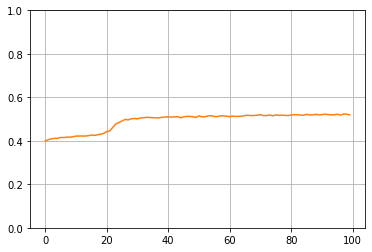

In [191]:
## Show the training plot
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

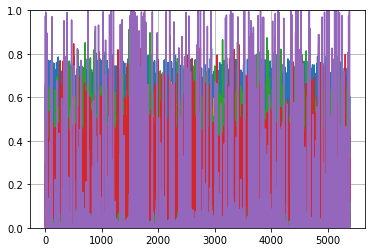

In [208]:
## Show the predictions plot
plt.plot(pd.DataFrame(y_pred))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Conclusion

1. After EDA, I found there are lots of outliers in price, but since there may be precious diamonds which have much high price, so the outliers of price are reasonable, I choose not to remove any outliers.

2. There are some invalid values, such as zeros in length, width and depth, so I remove those rows containing invalid values.

3. The data is not normally distributed, so I take the logarithms of numeric data to make them normally distributed.

4. I label the categorical varibales.

5. After calulating the entropy and information gain of each variables, I choose four explanatory variables which have low entropy and higher information gain, to construct the Neural Network.

6. I choose three layers to be in Neural Network, one input layer, one hidden layer and one output layer. For comparison, every model uses the same number of layers.

7. I tried different batch size when constructing Neural Network, when using batch size that is equal to 1 (stochastic gradient descent), the training and reporting time is pretty long, so fianlly I think mini-batch gradient descent is the best.

8. When using different activation functions, the accuracy and loss are different. When using all three activation functions as "relu", the loss is much higher and the accuracy is low, when using all three activation functions as "softmax", the loss improves but the accuracy is still low. When using the input and hidden layers' activation function as "relu" and the output layer's activation fucntion as "softmax", the loss decreases and the accuracy improves.

I think the reason for that is, as I mentioned and quoted above, "Disadvantages of ReLU is, when inputs approach zero, the gradient of the function becomes zero, the network cannot perform backpropagation and cannot learn." my output layers contain lots of values which are approximate to zero, therefore, change the output layer's activation function to softmax would improve the result a lot. 

Therefore, the "best" model in my mind in this assignment is the third Neural Network I constructed above.